# **Machine Learning ]
**

1.   List item
2.   List item


---
> Introduction to Machine Learning <br>

In [1]:
%pip install imblearn
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["font.size"] = 16

## **Prediksi karyawan left (1) atau tidak (0)**

*Check Risks Simply*

- Wrong prediction of employees staying - predicted to stay, even though they resigned/left
  - Resources can decrease so that productivity decreases
  - Incur costs for employee severance pay
  - There is a possibility that some targets will not be caught

- Wrong employee prediction left - predicted left, even though stay
  - Having opened the job opening first, HR could be wasting time.
  - Maybe restructure the team.

---
- Greater risk of incorrect prediction of employee stay
- If stay = negative (0) & left = positive (1)
- So we want to reduce the False Negative value
- In other words, increase the Recall value

$$
\text{Recall} = \cfrac{TP}{TP + FN}
$$

**Import Data**

In [3]:
def importData(filename):
    # Read Data
    data = pd.read_csv(filename)
    print(f"shape awal                    : {data.shape}, (#observasi, #fitur)")

    # Drop duplicate
    data = data.drop_duplicates()
    print(f"shape setelah drop duplikat   : {data.shape}, (#observasi, #fitur)")

    return data


In [4]:
filename = "data_hr.csv"
data = importData(filename = filename)

data.head()

shape awal                    : (14999, 10), (#observasi, #fitur)
shape setelah drop duplikat   : (11991, 10), (#observasi, #fitur)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,division,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
def splitInputOutput(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [6]:
target_column = "left"
X, y = splitInputOutput(data = data,
                        target_column = target_column)

X.head, y.head

(<bound method NDFrame.head of        satisfaction_level  last_evaluation  number_project  \
 0                    0.38             0.53               2   
 1                    0.80             0.86               5   
 2                    0.11             0.88               7   
 3                    0.72             0.87               5   
 4                    0.37             0.52               2   
 ...                   ...              ...             ...   
 11995                0.90             0.55               3   
 11996                0.74             0.95               5   
 11997                0.85             0.54               3   
 11998                0.33             0.65               3   
 11999                0.50             0.73               4   
 
        average_montly_hours  time_spend_company  Work_accident  \
 0                       157                   3              0   
 1                       262                   6              0   
 2         

In [7]:
y.value_counts(normalize = True)

,proportion
left,
0,0.833959
1,0.166041


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9592, 9), (2399, 9), (9592,), (2399,))

In [10]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,division,salary
9492,0.44,0.56,3,123,3,0,0,accounting,medium
11555,0.98,0.44,4,154,6,1,0,sales,medium
11301,0.76,0.99,3,133,4,0,0,sales,low
5578,0.47,0.55,2,156,2,0,0,management,medium
6241,0.84,0.68,4,151,2,0,0,technical,low


In [11]:
categorical_col = ["Work_accident", "promotion_last_5years", "division", "salary"]
numerical_col = list(set(X_train.columns) - set(categorical_col))

categorical_col, numerical_col

(['Work_accident', 'promotion_last_5years', 'division', 'salary'],
 ['number_project',
  'average_montly_hours',
  'satisfaction_level',
  'last_evaluation',
  'time_spend_company'])

In [12]:
def splitNumCat(data, num_col, cat_col):
    data_num = data[num_col]
    data_cat = data[cat_col]

    return data_num, data_cat


In [13]:
X_train_num, X_train_cat = splitNumCat(data = X_train,
                                       num_col = numerical_col,
                                       cat_col = categorical_col)

In [14]:

X_train_num.isna().any()

,0
number_project,False
average_montly_hours,False
satisfaction_level,False
last_evaluation,False
time_spend_company,False


In [17]:

from sklearn.impute import SimpleImputer

def imputerNum(data, imputer = None):
    if imputer == None:

        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")
        imputer.fit(data)

    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)

    return data_imputed, imputer


In [18]:
X_train_num_imputed, imputer_num = imputerNum(data = X_train_num)

In [19]:
X_train_num_imputed.head()

,number_project,average_montly_hours,satisfaction_level,last_evaluation,time_spend_company
9492,3.0,123.0,0.44,0.56,3.0
11555,4.0,154.0,0.98,0.44,6.0
11301,3.0,133.0,0.76,0.99,4.0
5578,2.0,156.0,0.47,0.55,2.0
6241,4.0,151.0,0.84,0.68,2.0


**Handling Categorical Data**

In [20]:
# Check missing value
X_train_cat.isna().any()

,0
Work_accident,False
promotion_last_5years,False
division,False
salary,False


In [21]:

def imputerCat(data, imputer = None):
    if imputer == None:

        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "constant",
                                fill_value = "UNKNOWN")
        imputer.fit(data)


    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)

    return data_imputed, imputer


In [22]:
X_train_cat_imputed, imputer_cat = imputerCat(data = X_train_cat)

In [23]:
X_train_cat_imputed.head()

,Work_accident,promotion_last_5years,division,salary
9492,0,0,accounting,medium
11555,1,0,sales,medium
11301,0,0,sales,low
5578,0,0,management,medium
6241,0,0,technical,low


**One Hot Encoding Data**

In [24]:
from sklearn.preprocessing import OneHotEncoder

def encoderCat(data, encoder_col = None, encoder = None):
    if encoder == None:
        encoder = OneHotEncoder(handle_unknown = "ignore",
                                drop = "if_binary")
        encoder.fit(data)
        encoder_col = encoder.get_feature_names_out(data.columns)


    data_encoded = encoder.transform(data).toarray()
    data_encoded = pd.DataFrame(data_encoded,
                                index = data.index,
                                columns = encoder_col)

    return data_encoded, encoder_col, encoder


In [25]:
X_train_cat_encoded, encoder_col, encoder_OHE = encoderCat(data = X_train_cat_imputed)

In [26]:
X_train_cat_imputed.head().T

,9492,11555,11301,5578,6241
Work_accident,0,1,0,0,0
promotion_last_5years,0,0,0,0,0
division,accounting,sales,sales,management,technical
salary,medium,medium,low,medium,low


In [27]:
X_train_cat_encoded.head().T

,9492,11555,11301,5578,6241
Work_accident_1,0.0,1.0,0.0,0.0,0.0
promotion_last_5years_1,0.0,0.0,0.0,0.0,0.0
division_IT,0.0,0.0,0.0,0.0,0.0
division_RandD,0.0,0.0,0.0,0.0,0.0
division_accounting,1.0,0.0,0.0,0.0,0.0
division_hr,0.0,0.0,0.0,0.0,0.0
division_management,0.0,0.0,0.0,1.0,0.0
division_marketing,0.0,0.0,0.0,0.0,0.0
division_product_mng,0.0,0.0,0.0,0.0,0.0
division_sales,0.0,1.0,1.0,0.0,0.0


In [28]:
encoder_col

array(['Work_accident_1', 'promotion_last_5years_1', 'division_IT',
       'division_RandD', 'division_accounting', 'division_hr',
       'division_management', 'division_marketing',
       'division_product_mng', 'division_sales', 'division_support',
       'division_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype=object)

In [29]:
X_train_concat = pd.concat([X_train_num_imputed, X_train_cat_encoded],
                           axis = 1)
X_train_concat.head()

,number_project,average_montly_hours,satisfaction_level,last_evaluation,time_spend_company,Work_accident_1,promotion_last_5years_1,division_IT,division_RandD,division_accounting,division_hr,division_management,division_marketing,division_product_mng,division_sales,division_support,division_technical,salary_high,salary_low,salary_medium
9492,3.0,123.0,0.44,0.56,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11555,4.0,154.0,0.98,0.44,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11301,3.0,133.0,0.76,0.99,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5578,2.0,156.0,0.47,0.55,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6241,4.0,151.0,0.84,0.68,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [30]:
# Cek missing values
X_train_concat.isna().any()

,0
number_project,False
average_montly_hours,False
satisfaction_level,False
last_evaluation,False
time_spend_company,False
Work_accident_1,False
promotion_last_5years_1,False
division_IT,False
division_RandD,False
division_accounting,False


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
y_train.value_counts()

,count
left,
0,7999
1,1593


In [33]:
# Buat objek
smt = SMOTE(sampling_strategy = "minority",
            random_state = 123)

# Fit objek
X_train_smote, y_train = smt.fit_resample(X_train_concat, y_train)

In [34]:
y_train.value_counts()

,count
left,
0,7999
1,7999


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
def standardizeData(data, scaler = None):
    if scaler == None:
        # Buat & Fit scaler
        scaler = StandardScaler()
        scaler.fit(data)

    # Tranform data
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled,
                               index = data.index,
                               columns = data.columns)

    return data_scaled, scaler


In [37]:
X_train_clean, scaler = standardizeData(data = X_train_smote)
X_train_clean.head()

,number_project,average_montly_hours,satisfaction_level,last_evaluation,time_spend_company,Work_accident_1,promotion_last_5years_1,division_IT,division_RandD,division_accounting,division_hr,division_management,division_marketing,division_product_mng,division_sales,division_support,division_technical,salary_high,salary_low,salary_medium
0,-0.578263,-1.486414,-0.431501,-0.890752,-0.471150,-0.351240,-0.110301,-0.298645,-0.235791,4.610650,-0.249391,-0.185446,-0.256504,-0.255541,-0.658294,-0.441395,-0.502330,-0.244209,-1.077862,1.203598
1,0.110942,-0.914843,1.603563,-1.561027,2.009674,2.973443,-0.110301,-0.298645,-0.235791,-0.241855,-0.249391,-0.185446,-0.256504,-0.255541,1.621142,-0.441395,-0.502330,-0.244209,-1.077862,1.203598
2,-0.578263,-1.302036,0.774463,1.511066,0.355791,-0.351240,-0.110301,-0.298645,-0.235791,-0.241855,-0.249391,-0.185446,-0.256504,-0.255541,1.621142,-0.441395,-0.502330,-0.244209,0.954362,-0.853479
3,-1.267467,-0.877967,-0.318442,-0.946608,-1.298091,-0.351240,-0.110301,-0.298645,-0.235791,-0.241855,-0.249391,5.972297,-0.256504,-0.255541,-0.658294,-0.441395,-0.502330,-0.244209,-1.077862,1.203598
4,0.110942,-0.970156,1.075953,-0.220477,-1.298091,-0.351240,-0.110301,-0.298645,-0.235791,-0.241855,-0.249391,-0.185446,-0.256504,-0.255541,-0.658294,-0.441395,2.138649,-0.244209,0.954362,-0.853479


**Transform Test Data**

In [38]:
def transformTestData(data, num_col, cat_col, encoder_col,
                      imputer_num, imputer_cat, encoder_cat,
                      scaler):
    # 1. Split num-cat
    data_num, data_cat = splitNumCat(data = data,
                                     num_col = num_col,
                                     cat_col = cat_col)

    # 2. Handling num
    data_num_imputed, _ = imputerNum(data = data_num,
                                     imputer = imputer_num)

    # 3. Handling cat
    data_cat_imputed, _ = imputerCat(data = data_cat,
                                     imputer = imputer_cat)
    data_cat_encoded, _, _ = encoderCat(data = data_cat_imputed,
                                        encoder_col = encoder_col,
                                        encoder = encoder_cat)

    # 4. Concat data
    data_concat = pd.concat([data_num_imputed, data_cat_encoded],
                            axis = 1)

    # 5. Scale data
    data_clean, _ = standardizeData(data = data_concat,
                                    scaler = scaler)

    return data_clean


In [39]:
X_test_clean = transformTestData(data = X_test,
                                 num_col = numerical_col,
                                 cat_col = categorical_col,
                                 encoder_col = encoder_col,
                                 imputer_num = imputer_num,
                                 imputer_cat = imputer_cat,
                                 encoder_cat = encoder_OHE,
                                 scaler = scaler)

X_test_clean.head()

,number_project,average_montly_hours,satisfaction_level,last_evaluation,time_spend_company,Work_accident_1,promotion_last_5years_1,division_IT,division_RandD,division_accounting,division_hr,division_management,division_marketing,division_product_mng,division_sales,division_support,division_technical,salary_high,salary_low,salary_medium
8578,1.489351,-0.232645,1.000581,1.287641,2.009674,-0.351240,-0.110301,-0.298645,-0.235791,4.610650,-0.249391,-0.185446,-0.256504,-0.255541,-0.658294,-0.441395,-0.50233,-0.244209,-1.077862,1.203598
5756,0.800146,1.168627,-1.411346,0.784935,0.355791,-0.351240,-0.110301,-0.298645,-0.235791,4.610650,-0.249391,-0.185446,-0.256504,-0.255541,-0.658294,-0.441395,-0.50233,-0.244209,-1.077862,1.203598
3994,0.110942,-0.804216,0.284540,1.455210,-1.298091,-0.351240,-0.110301,-0.298645,-0.235791,-0.241855,-0.249391,-0.185446,-0.256504,-0.255541,1.621142,-0.441395,-0.50233,-0.244209,-1.077862,1.203598
1784,-1.267467,-1.007032,-0.469187,-1.170033,-0.471150,2.973443,-0.110301,-0.298645,-0.235791,4.610650,-0.249391,-0.185446,-0.256504,-0.255541,-0.658294,-0.441395,-0.50233,-0.244209,-1.077862,1.203598
10508,0.110942,0.762996,-0.167696,1.455210,-0.471150,-0.351240,-0.110301,-0.298645,-0.235791,-0.241855,-0.249391,-0.185446,-0.256504,-0.255541,-0.658294,2.443712,-0.50233,-0.244209,-1.077862,1.203598


In [40]:
X_test_clean.columns

Index(['number_project', 'average_montly_hours', 'satisfaction_level',
       'last_evaluation', 'time_spend_company', 'Work_accident_1',
       'promotion_last_5years_1', 'division_IT', 'division_RandD',
       'division_accounting', 'division_hr', 'division_management',
       'division_marketing', 'division_product_mng', 'division_sales',
       'division_support', 'division_technical', 'salary_high', 'salary_low',
       'salary_medium'],
      dtype='object')

In [41]:
len(X_train_clean.columns)

20

---
# Multi-Layer Perceptron (Neural Network)

- Adapting the way brain cells transfer & process information.
- The smallest unit is a Neuron (Perceptron)

<center>
<img src="https://blog.camelot-group.com/wp-content/uploads/2022/01/Perceptron_byCamelot.png">
<br>
<a href="https://blog.camelot-group.com/2022/01/neural-networks-perceptron/">source</a>
</center>

1 Perceptron can accept multiple inputs
- 1 Perceptron produces 1 output
- Inputs will be added weighted first (`preActivation`)
- Then it will be activated using the `activation function` such as Sigmoid, ReLU, TanH, and so on.

---
## Feed Propagation
- For example, we want to solve a classification case
- We create a Neural Network architecture with 1 perceptron

In [42]:
def preActivation(X, w):
    """
    Fungsi untuk mendapatkan nilai pre activation (weighted-sum)
    :param X: <pandas DataFrame> data input
    :param w: <numpy array> weight dari masing-masing input
    :return a: <numpy array> weighted sum atau pre activation
    """
    a = np.dot(X, w[1:]) + w[0]

    return a

In [43]:
def activationFunction(a, types):
    """
    Fungsi untuk melakukan aktifasi nilai pre activation
    :param a: <numpy array> pre activation value
    :param types: <str> pilihan fungsi aktivasi
    :return y: <numpy array> output perceptron
    """
    if types == "linear":
        y = a
    elif types == "sigmoid":
        y = 1 / (1 + np.exp(-a))
    elif types == "relu":
        y = np.max(0, a)
    else:
        raise Exception("Activation Function tidak terdaftar")

    return y

In [44]:

w = np.random.rand(21)
w

array([0.90773864, 0.4494443 , 0.16479032, 0.77582619, 0.72826936,
       0.44668147, 0.70976273, 0.87597364, 0.48275021, 0.83645884,
       0.03738341, 0.56399099, 0.52773439, 0.02669193, 0.93301809,
       0.11462355, 0.09997393, 0.75604491, 0.20916482, 0.60629136,
       0.72499913])

In [45]:

a = preActivation(X = X_train_clean,
                  w = w)

In [46]:

y_pred_proba_train = activationFunction(a = a,
                                        types = "sigmoid")

In [47]:

thresh = 0.5

y_pred_train = (y_pred_proba_train > thresh).astype("int")

In [48]:

a = preActivation(X = X_test_clean,
                  w = w)

In [49]:

y_pred_proba_test = activationFunction(a = a,
                                       types = "sigmoid")

In [50]:

y_pred_test = (y_pred_proba_test > thresh).astype("int")

In [51]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [52]:

confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train)

array([[2392, 5607],
       [3575, 4424]])

In [53]:

accuracy_score(y_true = y_train,
               y_pred = y_pred_train)

0.42605325665708216

In [54]:

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["stay (0)", "left (1)"]))

              precision    recall  f1-score   support

    stay (0)       0.40      0.30      0.34      7999
    left (1)       0.44      0.55      0.49      7999

    accuracy                           0.43     15998
   macro avg       0.42      0.43      0.42     15998
weighted avg       0.42      0.43      0.42     15998



**Baseline**
- because the data is balanced, the baseline accuracy is 50%
- this model is worse than the baseline, so it must be improved

**Focus**
- `weighted_avg recall` has a value of 0.49, meaning that of those that were **really** left, only 49% were successfully predicted to be left.
- This means that there are still almost 50% of employees who left but were predicted incorrectly, in other words the risk is big.
- We want to minimize this


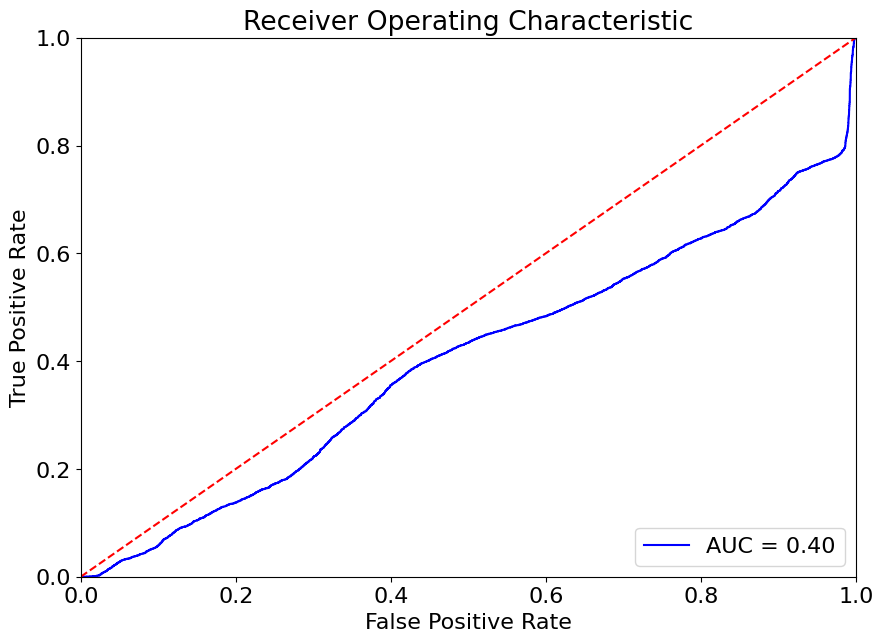

In [55]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,
                                         y_pred_proba_train)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:

confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test)

array([[ 584, 1417],
       [ 184,  214]])

In [57]:

accuracy_score(y_true = y_test,
               y_pred = y_pred_test)

0.3326385994164235

In [58]:

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["stay (0)", "left (1)"]))

              precision    recall  f1-score   support

    stay (0)       0.76      0.29      0.42      2001
    left (1)       0.13      0.54      0.21       398

    accuracy                           0.33      2399
   macro avg       0.45      0.41      0.32      2399
weighted avg       0.66      0.33      0.39      2399



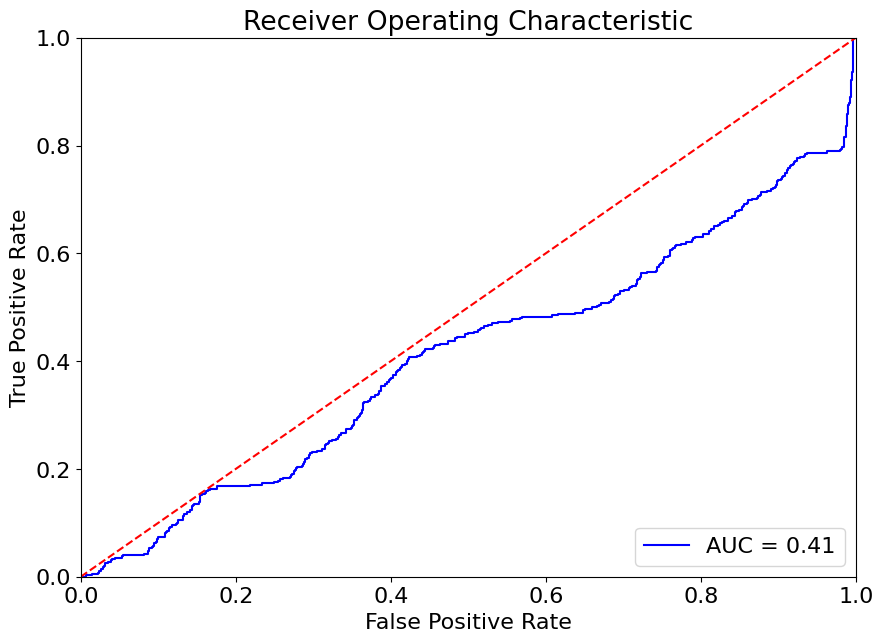

In [59]:

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_proba_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

---
# Gradient Descent

- The accuracy of the random model is still small, we want to improve it
- This means that we want to optimize **weight**
- Can be optimized using **Gradient Descent**

<center>
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning1.png">
<br>
<a href="https://www.javatpoint.com/gradient-descent-in-machine-learning">source</a>
</center>

Algoritma:
- Inisialisasi weight, *bisa random*
- Cari gradient error terhadap weight
- Lakukan update weight dari informasi gradient tersebut

$$
w_{\text{new}} = w_{\text{old}} - \nabla_{w} E
$$

- Ulangi hingga stopping criteria tercapai (max. iteration atau weight tidak berubah --> $\nabla_{w} E = 0$)

---
# Backpropagation & Gradient Descent

$$
\begin{align*}
a^{(i)} &= w_{0} + w_{1}x_{1}^{(i)} + w_{2}x_{2}^{(i)} + \cdots + w_{20}x_{20}^{(i)} \\
\hat{y}^{(i)} &= \sigma (a^{(i)}) = \cfrac{1}{1 + \exp(-a^{(i)})}\\
\text{error}^{(i)} &= (y^{(i)} - \hat{y}^{(i)})^{2}
\end{align*}
$$

Maka didapat

$$
\begin{align*}
\cfrac{\partial \text{error}}{\partial \hat{y}} &= -2 (y - \hat{y}) \\ \\
\cfrac{\partial \hat{y}}{\partial a} &= \sigma(a)(1 - \sigma(a)) \\ \\
\cfrac{\partial a}{\partial w_{0}} &= 1 \\ \\
\cfrac{\partial a}{\partial w_{1}} &= x_{1} \\ \\
\cfrac{\partial a}{\partial w_{2}} &= x_{2} \\ \\
\vdots \\ \\
\cfrac{\partial a}{\partial w_{20}} &= x_{20}
\end{align*}
$$

In [61]:
def gradientDescent(X, y,
                    learning_rate, max_iter,
                    epsilon = 1e-6):
    """
    Fungsi untuk melakukan update weight
    """
    X = np.array(X)
    n = X.shape[0]
    p = X.shape[1] + 1

    w = np.ones(p)

    w_hist = []
    loss_hist = []
    iter = 0
    previous_loss = 0

    for iter in range(max_iter):

        a = preActivation(X = X, w = w)
        y_pred = activationFunction(a = a, types = "sigmoid")


        current_loss = np.linalg.norm(y - y_pred)**2

        if np.abs(previous_loss - current_loss) < epsilon:
            break


        previous_loss = current_loss
        loss_hist.append(current_loss)
        w_hist.append(w)


        derr_dy = -2 * (y - y_pred)
        dy_da = y_pred * (1 - y_pred)

        derr_dw = np.zeros(p)
        for j in range(p):

            if j == 0:
                da_dw = np.ones(n)
            else:
                da_dw = X[:, j-1]


            derr_dw[j] = np.sum(derr_dy * dy_da * da_dw)



        for j in range(p):
            w[j] = w[j] - learning_rate * derr_dw[j]

        if iter%100 == 0:
            print(f"iterasi {iter+1} - Loss: {current_loss:.4f}")


    print(f"iterasi {iter+1} - Loss: {current_loss:.4f}")

    return loss_hist, w_hist

In [62]:
loss_hist, w_hist = gradientDescent(X = X_train_clean,
                                    y = y_train,
                                    learning_rate = 0.01,
                                    max_iter = 5000)

iterasi 1 - Loss: 7486.6155
iterasi 101 - Loss: 1967.8822
iterasi 201 - Loss: 1971.5554
iterasi 301 - Loss: 1975.0741
iterasi 401 - Loss: 1975.2194
iterasi 501 - Loss: 1974.8082
iterasi 601 - Loss: 1974.5176
iterasi 701 - Loss: 1974.3107
iterasi 801 - Loss: 1974.1602
iterasi 901 - Loss: 1974.0489
iterasi 1001 - Loss: 1973.9655
iterasi 1101 - Loss: 1973.9026
iterasi 1201 - Loss: 1973.8547
iterasi 1301 - Loss: 1973.8181
iterasi 1401 - Loss: 1973.7901
iterasi 1501 - Loss: 1973.7685
iterasi 1601 - Loss: 1973.7518
iterasi 1701 - Loss: 1973.7389
iterasi 1801 - Loss: 1973.7289
iterasi 1901 - Loss: 1973.7212
iterasi 2001 - Loss: 1973.7152
iterasi 2101 - Loss: 1973.7106
iterasi 2201 - Loss: 1973.7070
iterasi 2301 - Loss: 1973.7042
iterasi 2401 - Loss: 1973.7020
iterasi 2501 - Loss: 1973.7003
iterasi 2601 - Loss: 1973.6990
iterasi 2701 - Loss: 1973.6980
iterasi 2801 - Loss: 1973.6972
iterasi 2901 - Loss: 1973.6965
iterasi 3001 - Loss: 1973.6961
iterasi 3101 - Loss: 1973.6957
iterasi 3201 - Loss:

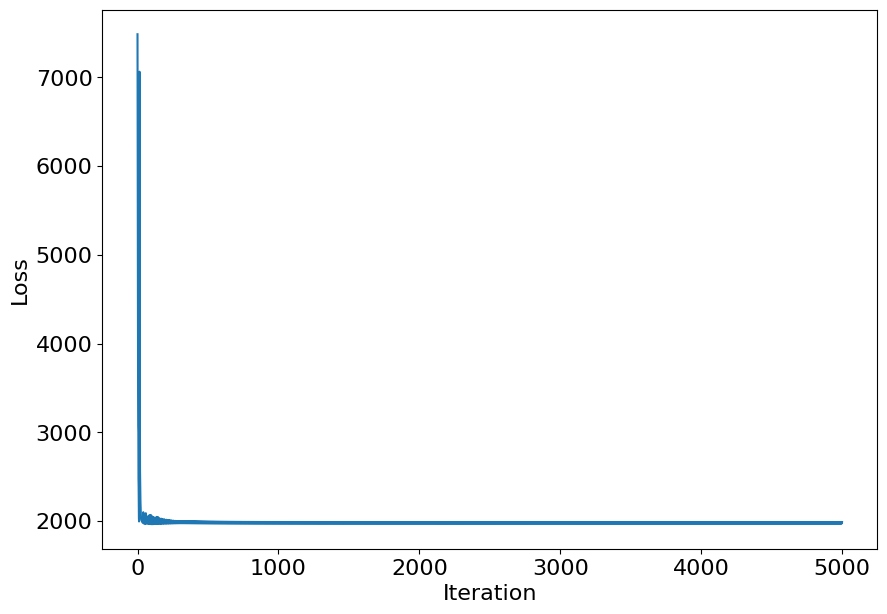

In [63]:

plt.plot([i for i in range(len(loss_hist))], loss_hist)
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.show()

In [85]:

w_best = w_hist[-1]
w_best

array([ -2.42099303,  -7.04281016,  -0.02665811, -10.3838011 ,
         0.86097781,  18.37040386,  -0.83115115,  -3.68936442,
         0.81270026,   0.42390778,   0.58668414,   0.84052542,
         0.44494051,   0.86974954,   0.83784214,   1.67425409,
         0.97321003,   1.40103913,   0.13614292,   1.4295161 ,
         0.963378  ])

In [86]:

a = preActivation(X = X_train_clean,
                  w = w_best)

In [87]:

y_pred_proba_train = activationFunction(a = a,
                                        types = "sigmoid")

In [88]:

thresh = 0.5

y_pred_train = (y_pred_proba_train > thresh).astype("int")

In [89]:

a = preActivation(X = X_test_clean,
                  w = w_best)

In [90]:

y_pred_proba_test = activationFunction(a = a,
                                       types = "sigmoid")

In [91]:

y_pred_test = (y_pred_proba_test > thresh).astype("int")

In [92]:

confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train)

array([[6306, 1693],
       [ 362, 7637]])

In [93]:

accuracy_score(y_true = y_train,
               y_pred = y_pred_train)

0.8715464433054132

In [94]:

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["stay (0)", "left (1)"]))

              precision    recall  f1-score   support

    stay (0)       0.95      0.79      0.86      7999
    left (1)       0.82      0.95      0.88      7999

    accuracy                           0.87     15998
   macro avg       0.88      0.87      0.87     15998
weighted avg       0.88      0.87      0.87     15998



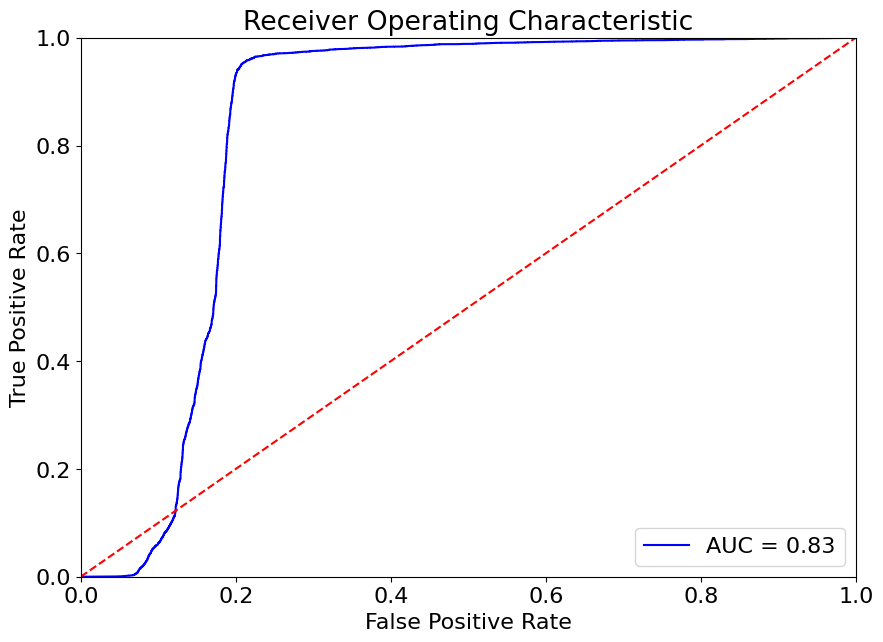

In [95]:

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,
                                         y_pred_proba_train)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:

confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test)

array([[1545,  456],
       [  24,  374]])

In [98]:

accuracy_score(y_true = y_test,
               y_pred = y_pred_test)

0.7999166319299709

In [99]:

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["stay (0)", "left (1)"]))

              precision    recall  f1-score   support

    stay (0)       0.98      0.77      0.87      2001
    left (1)       0.45      0.94      0.61       398

    accuracy                           0.80      2399
   macro avg       0.72      0.86      0.74      2399
weighted avg       0.90      0.80      0.82      2399



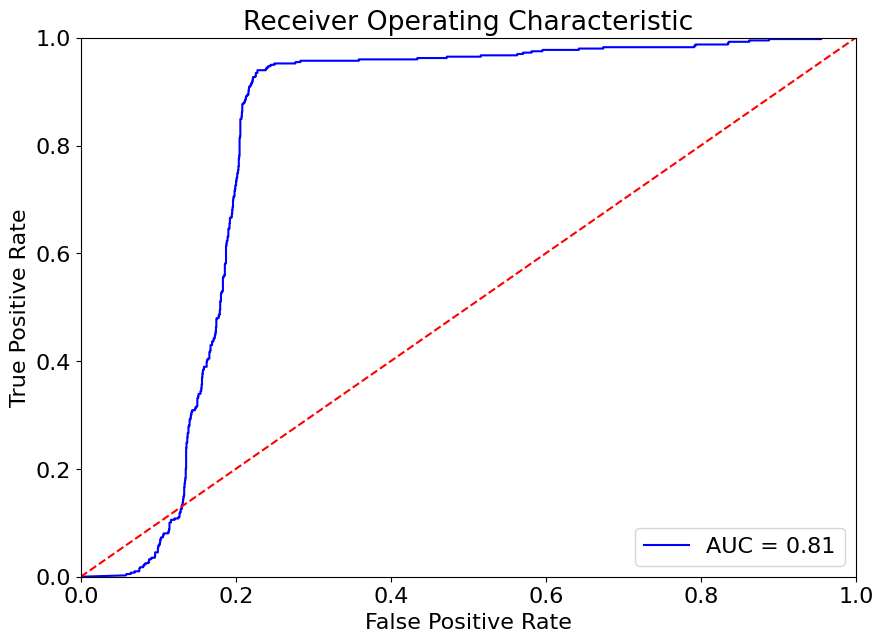

In [100]:

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_proba_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
# Import library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [102]:

model = Sequential([
    Dense(1, input_shape = (X_train_clean.shape[1],), activation = "sigmoid")
])


opt = SGD(learning_rate = 0.01)


model.compile(loss = "binary_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:

model_hist = model.fit(X_train_clean, y_train,
                       epochs = 10,
                       verbose = 1)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5383 - loss: 0.7734
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7734 - loss: 0.5371
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8005 - loss: 0.5040
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8043 - loss: 0.5038
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4964
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8098 - loss: 0.4933
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8118 - loss: 0.4930
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4888
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8195 - loss: 0.4900
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8064 - loss: 0.4887


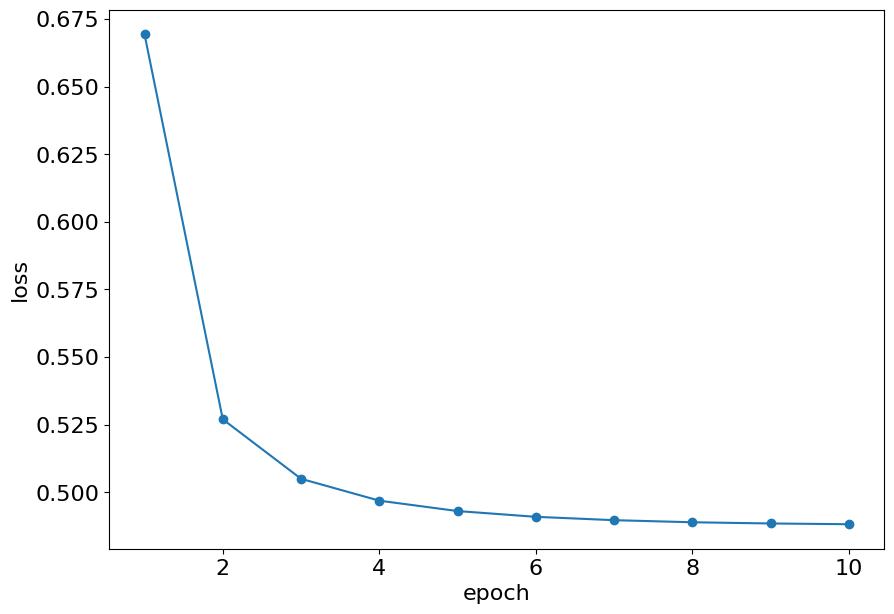

In [104]:

plt.plot(1 + np.arange(10), model_hist.history["loss"], marker="o")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [105]:

y_pred_proba_train = model.predict(X_train_clean)
y_pred_proba_train

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.45114523],
       [0.07375943],
       [0.58385676],
       ...,
       [0.7029754 ],
       [0.41937461],
       [0.450591  ]], dtype=float32)

In [107]:

thresh = 0.5

y_pred_train = (y_pred_proba_train > thresh).astype("int")

In [108]:

y_pred_proba_test = model.predict(X_test_clean)
y_pred_proba_test

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.3891897 ],
       [0.8423418 ],
       [0.21344444],
       ...,
       [0.05849435],
       [0.1428804 ],
       [0.9379839 ]], dtype=float32)

In [109]:

y_pred_test = (y_pred_proba_test > thresh).astype("int")

In [110]:

confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train)

array([[6168, 1831],
       [1156, 6843]])

In [111]:

accuracy_score(y_true = y_train,
               y_pred = y_pred_train)

0.8132891611451432

In [112]:

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["stay (0)", "left (1)"]))

              precision    recall  f1-score   support

    stay (0)       0.84      0.77      0.81      7999
    left (1)       0.79      0.86      0.82      7999

    accuracy                           0.81     15998
   macro avg       0.82      0.81      0.81     15998
weighted avg       0.82      0.81      0.81     15998



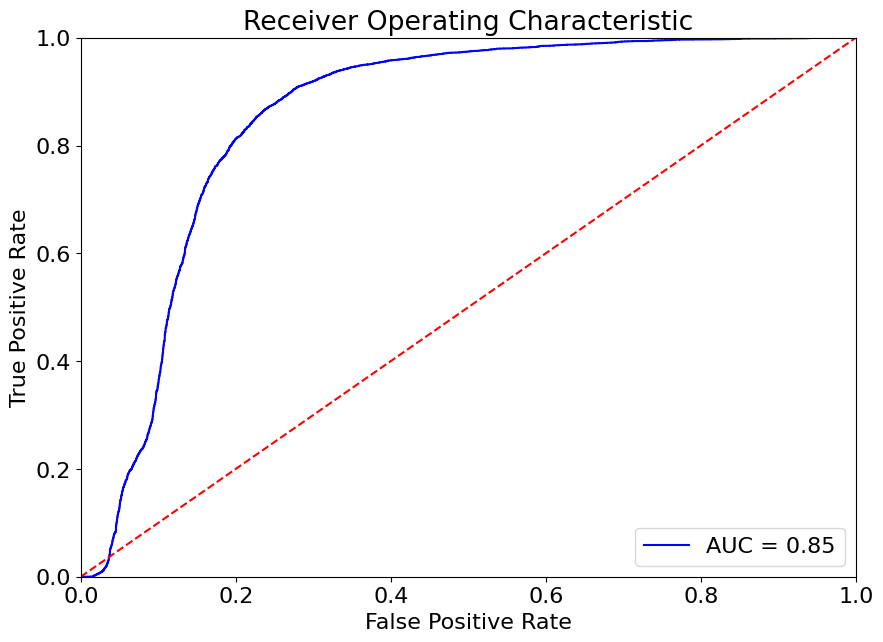

In [113]:

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,
                                         y_pred_proba_train)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [114]:

confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test)

array([[1541,  460],
       [  71,  327]])

In [115]:

accuracy_score(y_true = y_test,
               y_pred = y_pred_test)

0.7786577740725302

In [116]:

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["stay (0)", "left (1)"]))

              precision    recall  f1-score   support

    stay (0)       0.96      0.77      0.85      2001
    left (1)       0.42      0.82      0.55       398

    accuracy                           0.78      2399
   macro avg       0.69      0.80      0.70      2399
weighted avg       0.87      0.78      0.80      2399



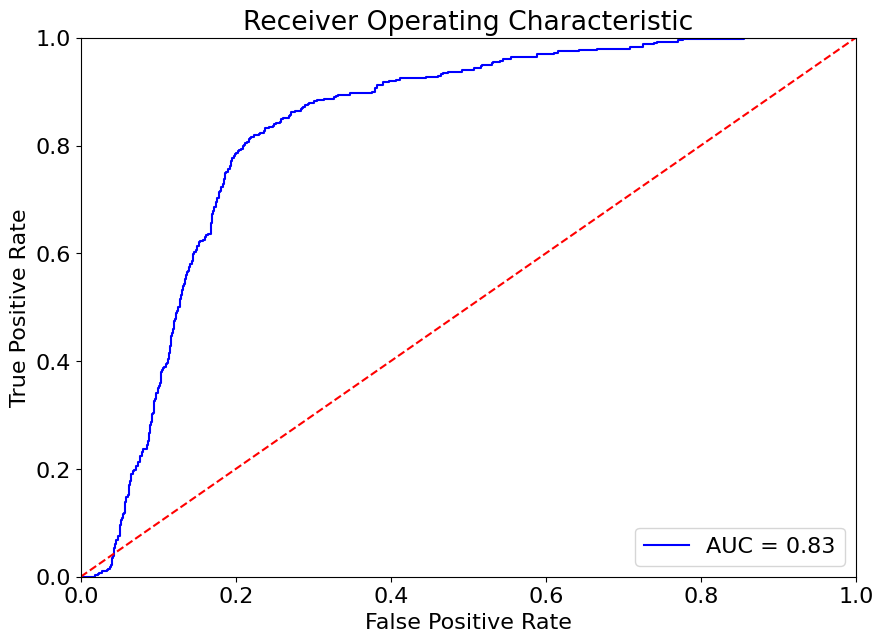

In [117]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_proba_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:

model = Sequential([
    Dense(3, input_shape = (X_train_clean.shape[1],), activation = "sigmoid"),
    Dense(1, activation = "sigmoid")
])

opt = SGD(learning_rate = 0.01)


model.compile(loss = "binary_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
# Train model
model_hist = model.fit(X_train_clean, y_train,
                       epochs = 10,
                       verbose = 1)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5719 - loss: 0.6806
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6572 - loss: 0.6418
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6990 - loss: 0.6161
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7318 - loss: 0.5927
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7622 - loss: 0.5640
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7807 - loss: 0.5439
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8048 - loss: 0.5192
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8141 - loss: 0.5077
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8236 - loss: 0.4922
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8265 - loss: 0.4791


In [120]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 3)                   │              63 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69 (280.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

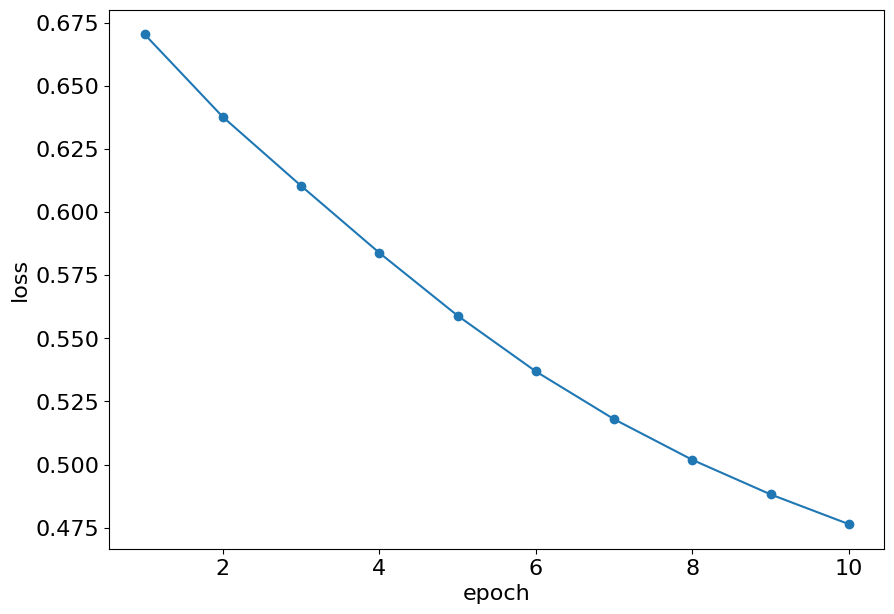

In [121]:

plt.plot(1 + np.arange(10), model_hist.history["loss"], marker="o")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [122]:

model_hist = model.fit(X_train_clean, y_train,
                       epochs = 100,
                       verbose = 1)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8354 - loss: 0.4669
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8431 - loss: 0.4568
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8480 - loss: 0.4451
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8422 - loss: 0.4468
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8478 - loss: 0.4338
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8475 - loss: 0.4311
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8488 - loss: 0.4257
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8519 - loss: 0.4179
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8480 - loss: 0.4173
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8528 - loss: 0.4104
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8516 - loss: 0.4078
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━

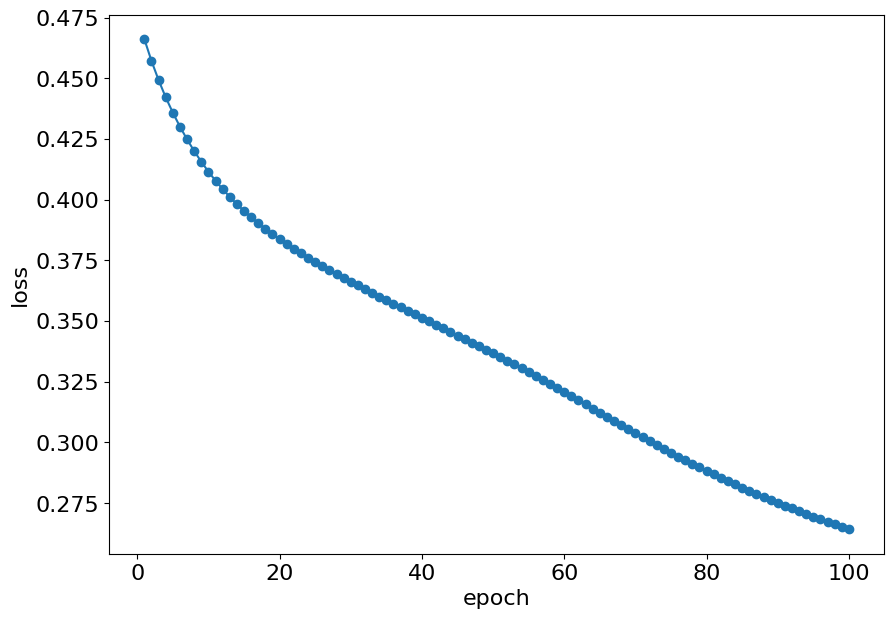

In [123]:

plt.plot(1 + np.arange(100), model_hist.history["loss"], marker="o")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [124]:

y_pred_proba_train = model.predict(X_train_clean)
y_pred_proba_train

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


array([[0.5451802 ],
       [0.2749963 ],
       [0.76023036],
       ...,
       [0.8712953 ],
       [0.8273431 ],
       [0.8381677 ]], dtype=float32)

In [125]:

thresh = 0.5

y_pred_train = (y_pred_proba_train > thresh).astype("int")

In [126]:

y_pred_proba_test = model.predict(X_test_clean)
y_pred_proba_test

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.43603742],
       [0.93077165],
       [0.02053207],
       ...,
       [0.01953292],
       [0.02024998],
       [0.3851318 ]], dtype=float32)

In [127]:

y_pred_test = (y_pred_proba_test > thresh).astype("int")

In [128]:

confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train)

array([[6950, 1049],
       [ 446, 7553]])

In [129]:

accuracy_score(y_true = y_train,
               y_pred = y_pred_train)

0.9065508188523566

In [130]:

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["stay (0)", "left (1)"]))

              precision    recall  f1-score   support

    stay (0)       0.94      0.87      0.90      7999
    left (1)       0.88      0.94      0.91      7999

    accuracy                           0.91     15998
   macro avg       0.91      0.91      0.91     15998
weighted avg       0.91      0.91      0.91     15998



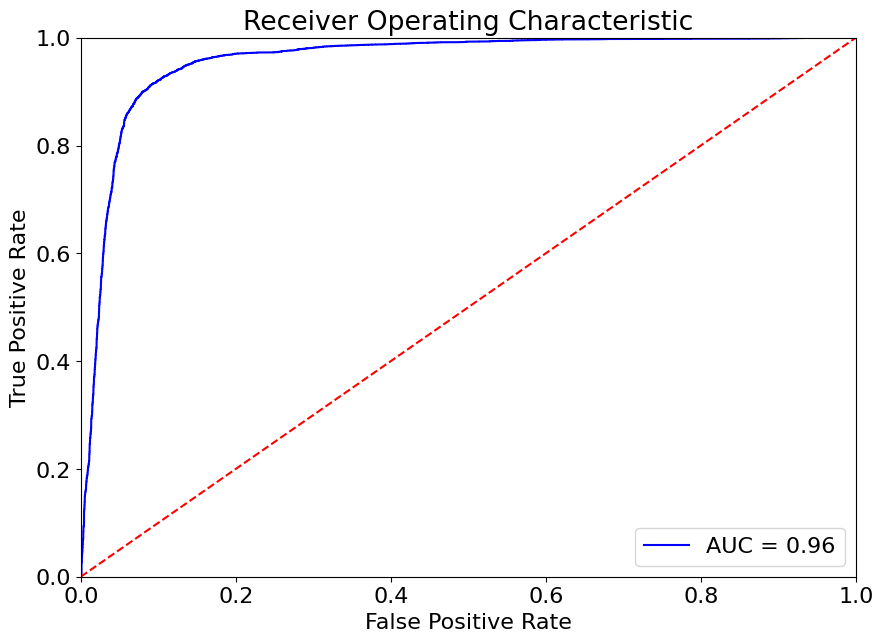

In [131]:

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,
                                         y_pred_proba_train)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [132]:

confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test)

array([[1726,  275],
       [  39,  359]])

In [133]:

accuracy_score(y_true = y_test,
               y_pred = y_pred_test)

0.8691121300541892

In [134]:

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["stay (0)", "left (1)"]))

              precision    recall  f1-score   support

    stay (0)       0.98      0.86      0.92      2001
    left (1)       0.57      0.90      0.70       398

    accuracy                           0.87      2399
   macro avg       0.77      0.88      0.81      2399
weighted avg       0.91      0.87      0.88      2399



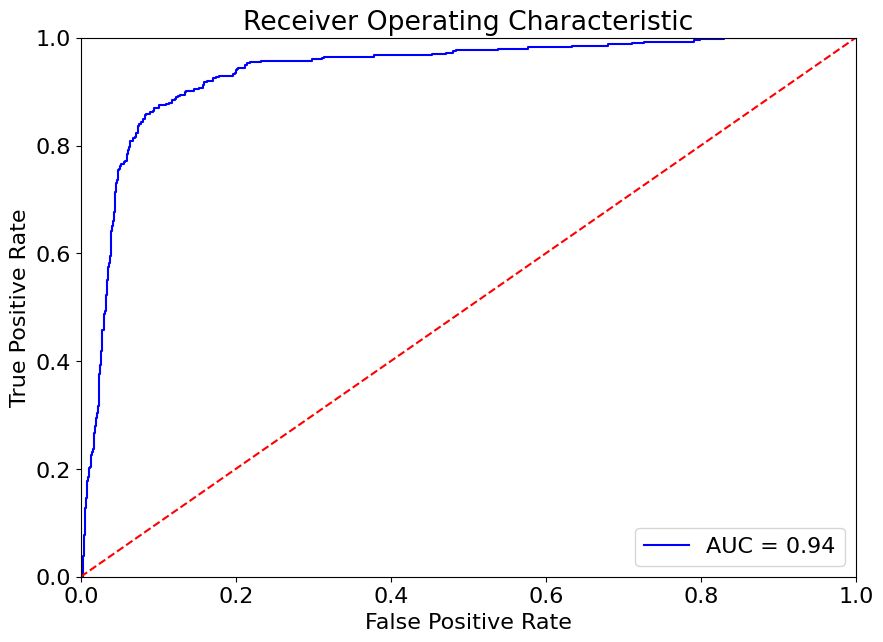

In [135]:

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_proba_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()